<a href="https://colab.research.google.com/github/kwonzero/Logo-Detection/blob/main/Load_Brand_Detective_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 10.8 MB/s eta 0:00:00


In [ ]:
import os
import fnmatch
import zipfile

from ultralytics import YOLO
import torch

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

#SEED


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(2024) # Seed 고정

# Load pretrained model


In [ ]:
model = YOLO('/content/drive/MyDrive/Project/기업연계(Logo Detection)/Detection Model/weight/best.pt')  # load a pretrained YOLOv8n detection model
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 1
{0: 'logo'}


# Inference


In [ ]:
results = model.predict('/content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test', conf = 0.1, iou = 0.2, save = True)


image 1/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/046232309e9b40598eca3678093ff5ee.jpg: 640x640 2 logos, 9.7ms
image 2/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/3a7074599e19029a9d206e18de0538f6416fd687135591db8823882f8fae.png: 640x640 3 logos, 8.4ms
image 3/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/5b356809012de26664d8923be8afccfd09cf318a96cb3ed0a405a7175d77.jpg: 640x640 3 logos, 7.4ms
image 4/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/a1c6fbe42fd45380b00bb0a73da30c3e00fc192c1973d4dbb9deac10c97b.jpg: 640x640 1 logo, 7.9ms
image 5/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/images (1).jpeg: 640x640 3 logos, 7.4ms
image 6/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/images (1).jpg: 640x640 1 logo, 7.4ms
image 7/27 /content/drive/MyDrive/Project/기업연계(Logo Detection)/Data/Test/images (2).jpg: 640x640 1 logo, 7.6ms
ima

### View inferenced images

test folder : predict


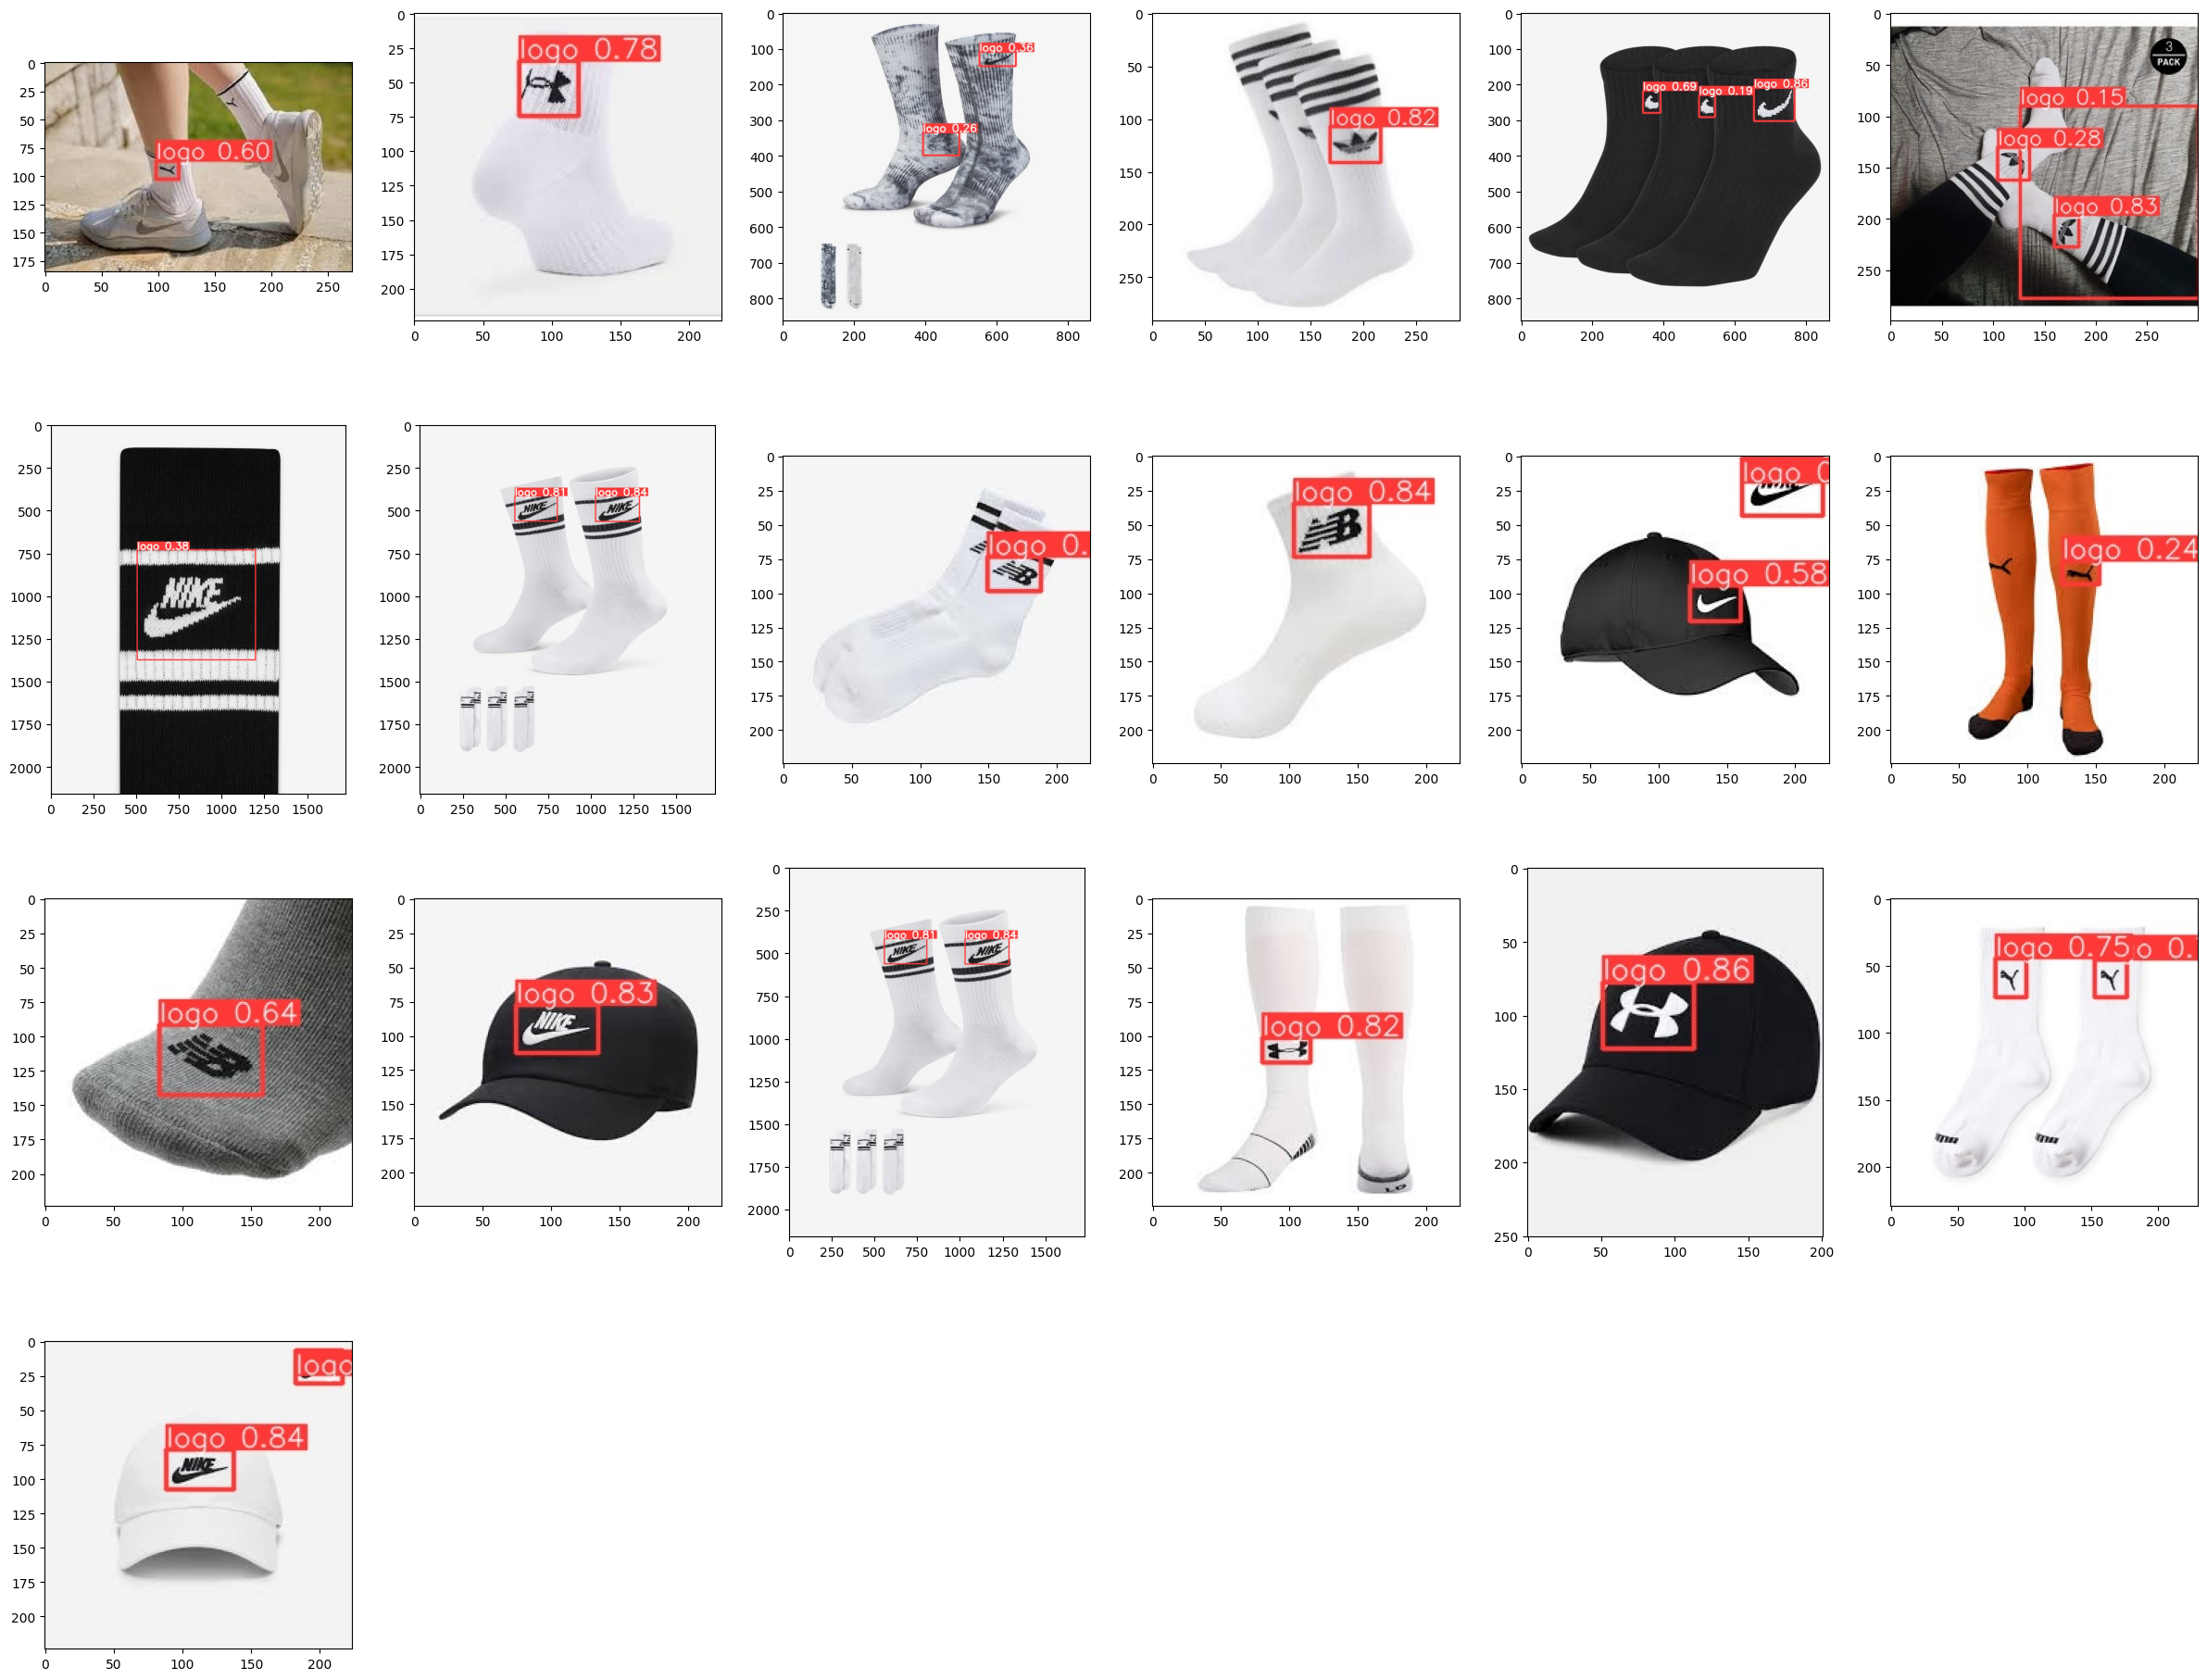

In [ ]:
for file_name in os.listdir(f'/content/runs/detect'):
    test_folder = file_name
    break
# test_folder = 'predict'
print(f'test folder : {test_folder}')

fig = plt.figure(figsize=(30, 30))
rows = 5
cols = 6
i = 1

for file_name in os.listdir(f'/content/runs/detect/{test_folder}'):
    if fnmatch.fnmatch(file_name, '*.jpg*'):
        image = cv2.imread(f'/content/runs/detect/{test_folder}/{file_name}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(image)
        i += 1
        # if i == 10: break;
plt.show()

#Crop Inferened Images


In [ ]:
for i, result in enumerate(results): # 모든 이미지 별로 이미지 경로 및 bbox list를 받아온다.
    boxes = result.boxes.cpu().numpy()

    for j, box in enumerate(boxes): # 이미지의 bbox list
        image = result.orig_img
        bbox = box.xyxy[0].astype(int) # bbox 가져오기
        cropped_image = image[bbox[1]:bbox[3], bbox[0]:bbox[2]] # image에서 bbox영역 crop

        cv2.imwrite(f'/content/drive/MyDrive/Project/기업연계/Logo Detection Model/cropped/crop_image_{i+1}_{j+1}.jpg', cropped_image)

### View Cropped images


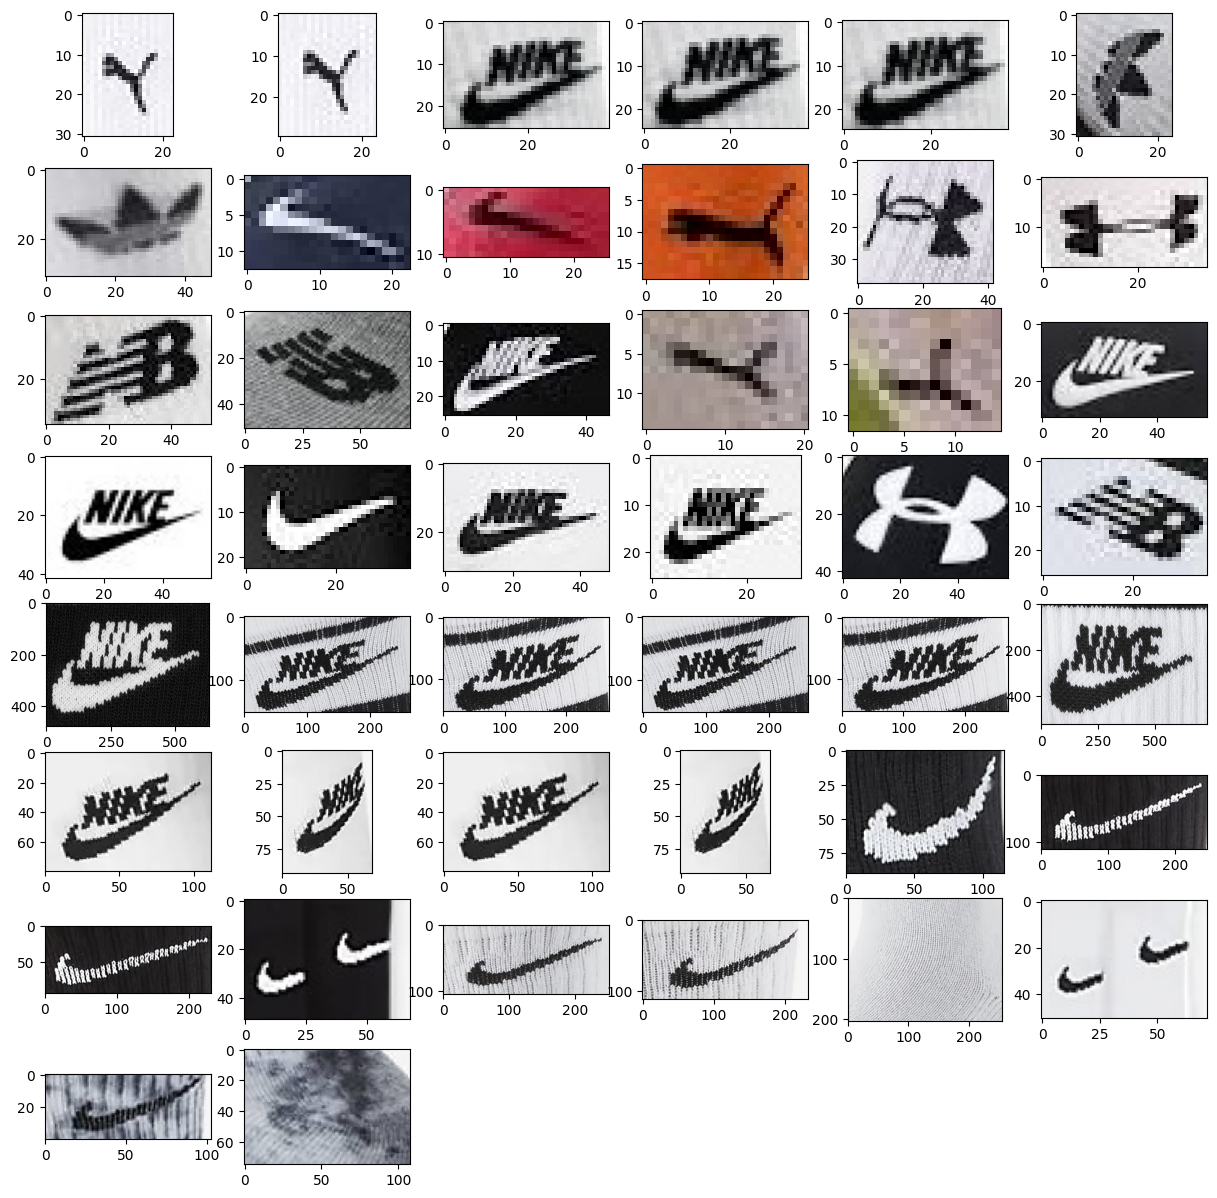

In [ ]:
# for image view
fig = plt.figure(figsize=(15, 15))
rows = 8
cols = 6
i = 1
for file_name in os.listdir(f'/content/drive/MyDrive/Project/기업연계/Logo Detection Model/cropped'):
    image = cv2.imread(f'/content/drive/MyDrive/Project/기업연계/Logo Detection Model/cropped/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.show()

In [ ]:
# Delete Cropped images at GD
# for file_path in os.listdir(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped'):
#     os.remove(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/{file_path}')